# Solution

### Implementation of the two algorithms

In [25]:
class RootFinder:
    def __init__(self, method, epsilon=1e-10):
        self.method = method
        self.epsilon = epsilon
        self.predictions = []

    def find_root(self, func, df, a, b, x0=None):
        self.predictions.clear()
        if self.method == 'bisection':
            return self.bisection(func, a, b)
        elif self.method == 'newton':
            if x0 is None:
                raise ValueError("Initial guess x0 must be provided for Newton's method.")
            return self.newton(func, df, x0)

    def bisection(self, f, a, b):
        while (b - a) / 2 > self.epsilon:
            c = (a + b) / 2
            self.predictions.append(c)
            if f(c) == 0:
                return c
            elif f(a) * f(c) < 0:
                b = c
            else:
                a = c
        return (a + b) / 2

    def newton(self, f, df, x0):
        x = x0
        while abs(f(x)) > self.epsilon:
            self.predictions.append(x)
            x = x - f(x) / df(x)
        return x

### 待求根函数的定义

In [26]:
import numpy as np

class Functions:
    def __init__(self, epsilon=1e-10):
        self.epsilon = epsilon

    def f1(self, x):
        return 2 * x - np.tan(x)

    def df1(self, x):
        return 2 - 1 / (np.cos(x) ** 2)

    def f2(self, x):
        return np.exp(x + 1) - 2 - x

    def df2(self, x):
        return np.exp(x + 1) - 1

    def f3(self, x):
        return x ** (-2) - np.sin(x)

    def df3(self, x):
        return -2 * x ** (-3) - np.cos(x)
    
    def f4(self, x):
        return x ** 2 - 2
    
    def df4(self, x):
        return 2 * x

functions = Functions()

### 图像分析

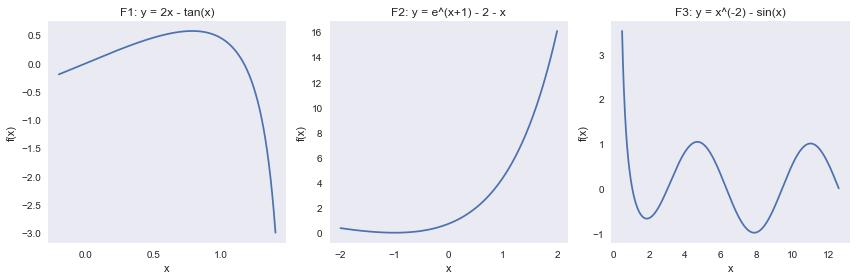

In [27]:
import numpy as np
import matplotlib.pyplot as plt

class Plotter:
    def __init__(self, a, b, func, title):
        self.a = a
        self.b = b
        self.func = func
        self.title = title

    def plot(self, num_points=1000):
        x_values = np.linspace(self.a, self.b, num_points)
        y_values = self.func(x_values)
        plt.plot(x_values, y_values, label=self.title)
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title(self.title)
        plt.grid()
# 定义区间
a1, b1 = -0.2, 1.4
a2, b2 = -2, 2
a3, b3 = 0.5, 4 * np.pi

# 创建Plotter实例
plotter1 = Plotter(a1, b1, functions.f1, 'F1: y = 2x - tan(x)')
plotter2 = Plotter(a2, b2, functions.f2, 'F2: y = e^(x+1) - 2 - x')
plotter3 = Plotter(a3, b3, functions.f3, 'F3: y = x^(-2) - sin(x)')

# 绘制图像
plt.figure(figsize=(12, 4))
plt.subplot(131)
plotter1.plot()

plt.subplot(132)
plotter2.plot()

plt.subplot(133)
plotter3.plot()

plt.style.use('seaborn')
plt.tight_layout()
plt.show()


由图像可知以下区间

In [28]:
root = []
# 函数1的根
roots1 = [(-0.2, 0.5),(1.0, 1.4)]
root.append(('Function 1', roots1))

# 函数2的根
roots2 = [(-2, 0)]
root.append(('Function 2', roots2))

# 函数3的根
roots3 = [(0.5, 2),(2, 4),(6, 8),(8, 10)]
root.append(('Function 3', roots3))

### 根的求解

In [29]:
from scipy import optimize
def scipy_root(func, a, b):
    return optimize.root_scalar(func, bracket=[a, b], method='brentq').root

In [30]:
roots1_bisection = []
for interval in roots1:
    finder = RootFinder('bisection')
    root = finder.find_root(functions.f1, None, interval[0], interval[1])
    roots1_bisection.append(root)

print(f'Bisection_roots f1: {roots1_bisection}')

roots1_newton = [] 
for interval in roots1:
    x0 = (interval[0] + interval[1]) / 2
    finder = RootFinder('newton')
    root = finder.find_root(functions.f1, functions.df1, None, None, x0)
    roots1_newton.append(root)
    
print(f'Newton_roots f1: {roots1_newton}')

roots1_scipy = []
for interval in roots1:
    root = scipy_root(functions.f1, interval[0], interval[1])
    roots1_scipy.append(root)

print(f'Scipy_roots f1: {roots1_scipy}')

Bisection_roots f1: [5.8207652983302947e-11, 1.1655611851252616]
Newton_roots f1: [0.0, 1.1655611852072116]
Scipy_roots f1: [-6.208381588204088e-17, 1.1655611852072105]


In [31]:
roots2_bisection = []
for interval in roots2:
    finder = RootFinder('bisection')
    root = finder.find_root(functions.f2, None, interval[0], interval[1])
    roots2_bisection.append(root)

print(f'Bisection_roots f2: {roots2_bisection}')

roots2_newton = []
for interval in roots2:
    x0 = (interval[0] + interval[1]) / 2
    finder = RootFinder('newton') 
    root = finder.find_root(functions.f2, functions.df2, None, None, x0)
    roots2_newton.append(root)

print(f'Newton_roots f2: {roots2_newton}')

roots2_scipy = []
for interval in roots2:
    try:
        roots2_scipy.append(scipy_root(functions.f2, interval[0], interval[1]))
    except ValueError as e:
        roots2_scipy.append(f'Error: {e}')

print(f'Scipy_roots f2: {roots2_scipy}')

Bisection_roots f2: [-1.0]
Newton_roots f2: [-1.0]
Scipy_roots f2: ['Error: f(a) and f(b) must have different signs']


In [32]:
roots3_bisection = []
for interval in roots3:
    finder = RootFinder('bisection')
    root = finder.find_root(functions.f3, None, interval[0], interval[1])
    roots3_bisection.append(root)

print(f'Bisection_roots f3: {roots3_bisection}')

roots3_newton = []
for interval in roots3: 
    x0 = (interval[0] + interval[1]) / 2
    finder = RootFinder('newton')
    root = finder.find_root(functions.f3, functions.df3, None, None, x0)
    roots3_newton.append(root)

print(f'Newton_roots f3: {roots3_newton}')  

roots3_scipy = []
for interval in roots3:
    root = scipy_root(functions.f3, interval[0], interval[1]) 
    roots3_scipy.append(root)

print(f'Scipy_roots f3: {roots3_scipy}')

Bisection_roots f3: [1.068223544250941, 3.032645418366883, 6.308316825248767, 9.413492803170811]
Newton_roots f3: [1.068223544197249, 3.032645418388756, 6.3083168252685535, 9.413492803170124]
Scipy_roots f3: [1.068223544197249, 3.032645418388756, 6.3083168252685535, 9.4134928031701]


### 误差分析

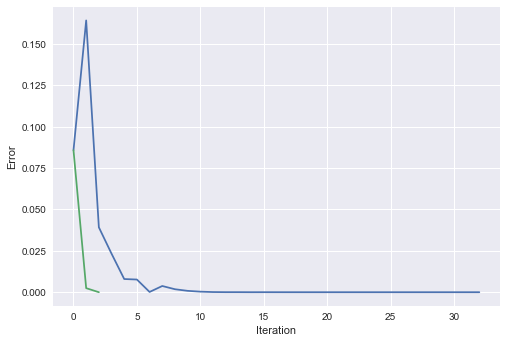

In [33]:
class ErrorAnalysis:
    
    def __init__(self, f, df, a, b, epsilon, method='bisection'):
        self.f = f 
        self.df = df
        self.a = a
        self.b = b
        self.epsilon = epsilon
        self.method = method
        
    def find_root(self):
        if self.method == 'bisection':
            finder = RootFinder('bisection', self.epsilon)
            self.root = finder.find_root(self.f, None, self.a, self.b)
            self.predictions = finder.predictions
        elif self.method == 'newton':
            x0 = (self.a + self.b)/2
            finder = RootFinder('newton', self.epsilon)
            self.root = finder.find_root(self.f, self.df, None, None, x0)
            self.predictions = finder.predictions
            
    def compute_error(self, actual_root):
        self.errors = [abs(x - actual_root) for x in self.predictions]
        
    def plot_error(self):
        plt.plot(range(len(self.errors)), self.errors)
        plt.xlabel('Iteration')
        plt.ylabel('Error')
        
# 使用示例  
f4 = functions.f4
df4 = functions.df4

analyzer1 = ErrorAnalysis(f4, df4, 1, 2, 1e-10, 'bisection')
analyzer1.find_root()
analyzer1.compute_error(np.sqrt(2))
analyzer1.plot_error()

analyzer2 = ErrorAnalysis(f4, df4, 1, 2, 1e-10, 'newton') 
analyzer2.find_root()
analyzer2.compute_error(np.sqrt(2))
analyzer2.plot_error()